In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.utils.data as data_utils
from matplotlib import cm
import numpy as np
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
#import backspinpy
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
import torch.nn.functional as F
import math
import gpytorch

import urllib.request
import os.path
from scipy.io import loadmat
from math import floor

# Make plots inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['floor']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
torch.manual_seed(1)    # reproducible

In [4]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = True
N_TEST_IMG = 5

# GeneFiltered

In [5]:
dfref = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/GBMprim_UMI_WithCluster_New.tab", index_col =0 ,header=0, sep="\t")
dfref.shape

C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,2

(20129, 4073)

In [6]:
dfref.head()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOC2L,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
set(dfref.loc["Cluster"])

{'CD45+',
 'CL1_KI09',
 'CL2_KI12',
 'CL3_KI07',
 'CL4_KI12',
 'CL5_KI01',
 'CL6_KI03.07',
 'CL7_KI06',
 'CL8_KI16',
 'MS1_KI24',
 'MS2_KI09',
 'MS3',
 'MS4_KI09',
 'MS5',
 'MS6_KI17.05',
 'MS7_KI09',
 'MS8_KI16',
 'NL1_KI15.12',
 'PN1_KI15.12.08.01',
 'PN2_KI15'}

In [9]:
dfref=dfref.T.loc[~dfref.loc["Cluster"].isin(["CD45+"])].T
dfref.shape

(20129, 4044)

In [10]:
proto = pd.Series({'CL1_KI09':   1,
     'CL2_KI12': 2,
       'CL3_KI07':  3,
      'CL4_KI12': 4,
         'CL5_KI01':5,
       'CL6_KI03.07': 6,
        'CL7_KI06': 7,
      'CL8_KI16':8,
                    'MS1_KI24':9,
       'MS2_KI09':  10,
       'MS3':  11,
      'MS4_KI09':12,
       'MS5': 13,
       'MS6_KI17.05':14,
       'MS7_KI09' : 15,
       'MS8_KI16': 16,
       'NL1_KI15.12':17,
       'PN1_KI15.12.08.01':18,
                   'PN2_KI15':19})

refct_dev = dfref.loc["Cluster"].values
refprotogruop = proto.ix[refct_dev].values
len(refprotogruop)

C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


4044

In [11]:
dfref.loc["Cluster"]=refprotogruop
dfrefclus=dfref.loc["Cluster"]
dfrefclus.head()

KI009-1772-122-307-C01    1
KI009-1772-122-307-E01    1
KI009-1772-122-307-F01    1
KI009-1772-122-307-C02    1
KI009-1772-122-307-F02    1
Name: Cluster, dtype: object

In [12]:
dfref=dfref.iloc[:-1,:]
dfref.tail()

,KI009-1772-122-307-C01,KI009-1772-122-307-E01,KI009-1772-122-307-F01,KI009-1772-122-307-C02,KI009-1772-122-307-F02,KI009-1772-122-307-B03,KI009-1772-122-307-C03,KI009-1772-122-307-G04,KI009-1772-122-307-C06,KI009-1772-122-307-C07,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
BPY2-loc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CDY1-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPRY3-loc2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
VAMP7-loc1,0,0,0,0,0,2,0,1,1,2,...,1,0,1,0,2,0,0,1,0,0
IL9R-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dfref.shape

(14766, 4044)

In [15]:
dfnew=pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/TCGA_GBM/TCGA_GBM_RNAseq173patientFPKM.tab", index_col =0 ,header=0, sep="\t")

In [16]:
dfnew.shape

(55269, 173)

In [18]:
dfnew.columns=newcell

In [19]:
dfgbm=dfnew
dfgbm.shape

(55269, 173)

In [20]:
dfgbm.tail()

,TCGA-02-0047,TCGA-02-0055,TCGA-02-2483,TCGA-02-2485,TCGA-02-2486,TCGA-06-0125,TCGA-06-0125,TCGA-06-0129,TCGA-06-0130,TCGA-06-0132,...,TCGA-41-3915,TCGA-41-4097,TCGA-41-5651,TCGA-76-4925,TCGA-76-4926,TCGA-76-4927,TCGA-76-4928,TCGA-76-4929,TCGA-76-4931,TCGA-76-4932
Gene name,,,,,,,,,,,,,,,,,,,,,
ZYG11B,17.230593,16.883656,17.289715,17.111389,16.519342,17.240248,17.581842,17.489280,16.619860,17.568463,...,16.789542,16.805885,17.189744,17.284239,17.345731,17.017312,16.784149,17.407195,17.131112,17.502460
ZYX,20.302136,21.822427,20.668375,20.649502,21.295852,22.141838,20.987639,20.207941,21.836754,20.843191,...,21.092344,20.553436,19.985210,21.667008,20.715427,21.267766,22.432762,19.880221,21.153376,21.636594
ZYXP1,0.000000,0.000000,0.000000,0.000000,0.000000,11.597982,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZZEF1,16.567405,15.431349,15.823134,16.263911,15.507753,16.528951,16.597016,17.002152,15.789809,15.722644,...,16.003750,16.790755,15.723177,15.725658,16.251290,16.506064,16.205019,16.979608,16.749817,15.882420
hsa-mir-1253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
dfgbm=dfgbm.T
dfgbm=dfgbm.loc[~dfgbm.index.duplicated(keep='first')].T
dfgbm.shape

(55269, 166)

In [22]:
dfref.shape

(14766, 4044)

In [23]:
commongene=list(set(dfref.index) & set(dfgbm.index))
len(commongene)

13797

In [24]:
dfref=dfref.loc[commongene]
dfref.shape

(13797, 4044)

In [25]:
dfgbm=dfgbm.loc[commongene]
dfgbm.shape

(13797, 166)

# PowerLaw_Normalized

In [26]:
mmgbm=(dfgbm.sub(dfgbm.min(1),0)).div((dfgbm.max(1)-dfgbm.min(1)),0)
mmgbm.max(1)

Gene name
NUDT14      1.0
ZNHIT3      1.0
SMU1        1.0
NUDT5       1.0
EHD4        1.0
FAM219B     1.0
LCA5L       1.0
COA3        1.0
MTMR12      1.0
SMARCA4     1.0
DIO2        1.0
MAGEF1      1.0
GOLGA8A     1.0
SLC10A6     1.0
ARC         1.0
GNPDA2      1.0
DERL2       1.0
ENKD1       1.0
CDH4        1.0
VPS13D      1.0
ZMAT5       1.0
CCDC13      1.0
PTK2        1.0
ACAT1       1.0
LGALS3BP    1.0
CCL5        1.0
PHAX        1.0
RARRES2     1.0
GTF2A2      1.0
ZNF410      1.0
           ... 
SSRP1       1.0
UBAP2L      1.0
AASDHPPT    1.0
LMNB2       1.0
UBN1        1.0
RBM24       1.0
EBAG9       1.0
PDE9A       1.0
SCN2A       1.0
ZNF665      1.0
DYRK2       1.0
FARSB       1.0
ZIK1        1.0
DFFB        1.0
DALRD3      1.0
PBDC1       1.0
PAK2        1.0
VPS13A      1.0
RAB9B       1.0
YOD1        1.0
STRN4       1.0
SOWAHC      1.0
PIAS4       1.0
MORN1       1.0
REXO2       1.0
LYN         1.0
PRSS1       1.0
NAT14       1.0
CALML4      1.0
DPH5        1.0
Length: 13797,

In [27]:
medgbm = pd.DataFrame(np.sort(mmgbm.values, axis=1), index=mmgbm.index, columns=mmgbm.columns)
medgbm.mean(0)

TCGA-02-0047    0.000000
TCGA-02-0055    0.069882
TCGA-02-2483    0.111041
TCGA-02-2485    0.139932
TCGA-02-2486    0.163502
TCGA-06-0125    0.183724
TCGA-06-0129    0.200243
TCGA-06-0130    0.214473
TCGA-06-0132    0.227144
TCGA-06-0138    0.238527
TCGA-06-0139    0.248492
TCGA-06-0141    0.257847
TCGA-06-0152    0.266323
TCGA-06-0156    0.274165
TCGA-06-0157    0.281775
TCGA-06-0158    0.288631
TCGA-06-0168    0.295275
TCGA-06-0171    0.301638
TCGA-06-0174    0.307586
TCGA-06-0178    0.313321
TCGA-06-0184    0.318806
TCGA-06-0187    0.323858
TCGA-06-0190    0.328928
TCGA-06-0210    0.333757
TCGA-06-0211    0.338701
TCGA-06-0219    0.343359
TCGA-06-0221    0.347793
TCGA-06-0238    0.352138
TCGA-06-0644    0.356510
TCGA-06-0645    0.360765
                  ...   
TCGA-28-5207    0.661612
TCGA-28-5208    0.665475
TCGA-28-5209    0.669452
TCGA-28-5213    0.673489
TCGA-28-5215    0.677598
TCGA-28-5216    0.681930
TCGA-28-5218    0.686469
TCGA-28-5220    0.690994
TCGA-32-1970    0.695763


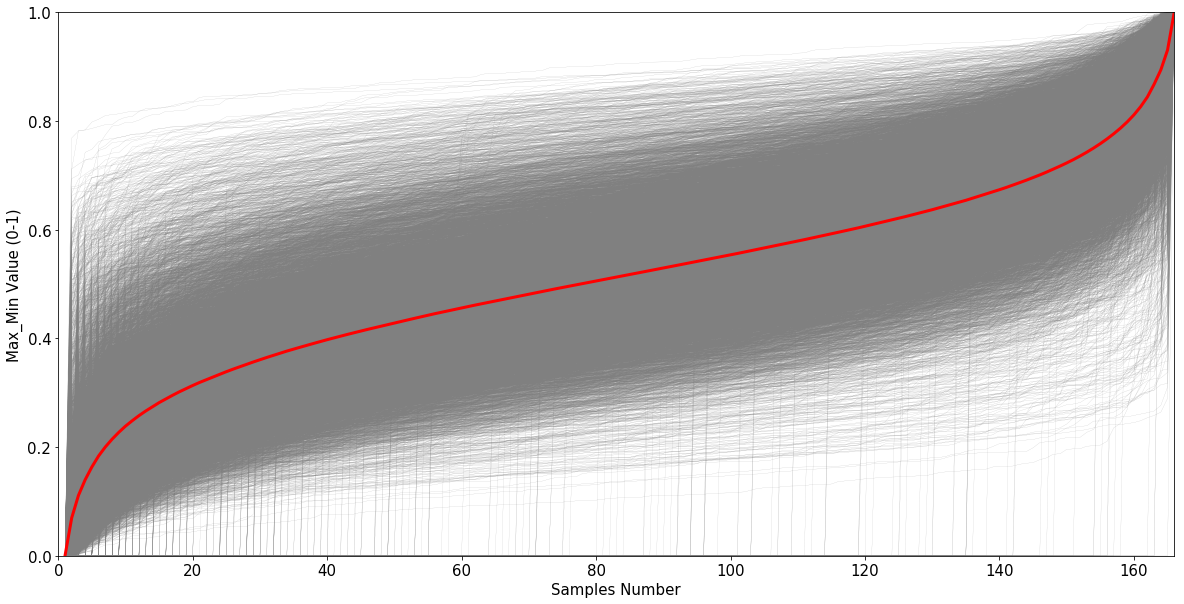

In [28]:
#Plot...

In [29]:
gbmpow=numpy.polyfit(x, y, 0, w=numpy.sqrt(y))
gbmpow

array([0.56804603])

In [31]:
mmref=(dfref.sub(dfref.min(1),0)).div((dfref.max(1)-dfref.min(1)),0)
medref = pd.DataFrame(np.sort(mmref.values, axis=1), index=mmref.index, columns=mmref.columns)
medref.mean(0)

KI009-1772-122-307-C01    0.000000e+00
KI009-1772-122-307-E01    0.000000e+00
KI009-1772-122-307-F01    0.000000e+00
KI009-1772-122-307-C02    0.000000e+00
KI009-1772-122-307-F02    0.000000e+00
KI009-1772-122-307-B03    9.574574e-08
KI009-1772-122-307-C03    2.167466e-07
KI009-1772-122-307-G04    2.167466e-07
KI009-1772-122-307-C06    2.167466e-07
KI009-1772-122-307-C07    2.167466e-07
KI009-1772-122-307-H07    2.167466e-07
KI009-1772-122-307-D08    3.124924e-07
KI009-1772-122-307-E08    3.124924e-07
KI009-1772-122-307-B09    3.124924e-07
KI009-1772-122-307-D09    3.124924e-07
KI009-1772-122-307-E09    3.124924e-07
KI009-1772-122-307-C10    3.124924e-07
KI009-1772-122-307-C12    3.124924e-07
KI009-1772-122-308-F01    4.334932e-07
KI009-1772-122-308-F02    4.334932e-07
KI009-1772-122-308-G02    4.334932e-07
KI009-1772-122-308-G03    4.334932e-07
KI009-1772-122-308-E08    5.292390e-07
KI009-1772-122-308-D10    7.417889e-07
KI009-1773-030-084-A02    8.000054e-07
KI009-1773-030-084-F05   

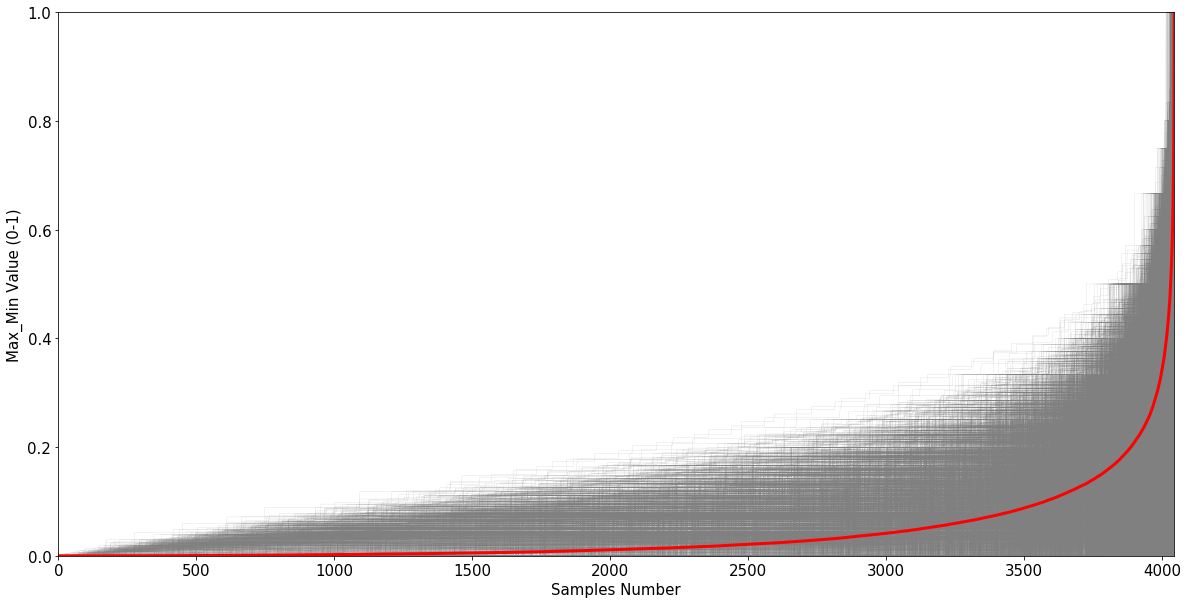

In [32]:
#Plot...

In [35]:
refpow=numpy.polyfit(x, y, 0, w=numpy.sqrt(y))

In [36]:
#mmgbmadj=mmgbm**((gbmpow/refpow+1)[0])
medgbmadj = pd.DataFrame(np.sort(mmgbmadj.values, axis=1), index=mmgbmadj.index, columns=mmgbmadj.columns)
medgbmadj.mean(0)

TCGA-02-0047    0.000000
TCGA-02-0055    0.001036
TCGA-02-2483    0.001927
TCGA-02-2485    0.002843
TCGA-02-2486    0.003706
TCGA-06-0125    0.004685
TCGA-06-0129    0.005599
TCGA-06-0130    0.006518
TCGA-06-0132    0.007414
TCGA-06-0138    0.008313
TCGA-06-0139    0.009197
TCGA-06-0141    0.010096
TCGA-06-0152    0.010948
TCGA-06-0156    0.011794
TCGA-06-0157    0.012676
TCGA-06-0158    0.013527
TCGA-06-0168    0.014378
TCGA-06-0171    0.015244
TCGA-06-0174    0.016072
TCGA-06-0178    0.016913
TCGA-06-0184    0.017756
TCGA-06-0187    0.018564
TCGA-06-0190    0.019403
TCGA-06-0210    0.020234
TCGA-06-0211    0.021110
TCGA-06-0219    0.021980
TCGA-06-0221    0.022828
TCGA-06-0238    0.023673
TCGA-06-0644    0.024547
TCGA-06-0645    0.025421
                  ...   
TCGA-28-5207    0.203787
TCGA-28-5208    0.208348
TCGA-28-5209    0.213091
TCGA-28-5213    0.217998
TCGA-28-5215    0.223100
TCGA-28-5216    0.228515
TCGA-28-5218    0.234225
TCGA-28-5220    0.240190
TCGA-32-1970    0.246581


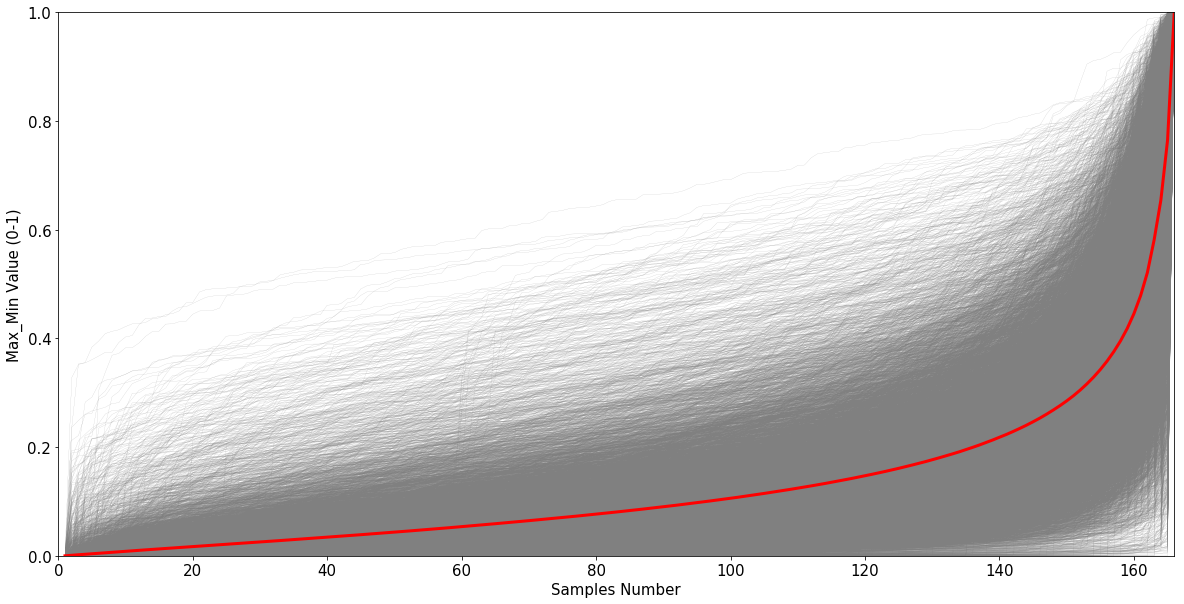

In [37]:
#Plot...

# Conv1D_Tanh

In [38]:
dfrefclus.values

array([1, 1, 1, ..., 15, 15, 15], dtype=object)

In [39]:
train_target = torch.tensor(dfrefclus.values.astype(np.float32))


In [40]:
train = torch.tensor(mmref.T.values.astype(np.float32)) 


In [41]:
train=train.unsqueeze(2).transpose(1,2)

In [43]:
train_tensor = data_utils.TensorDataset(train, train_target) 

In [44]:
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = 1, shuffle = True)

In [46]:
test=torch.tensor(mmgbmadj.T.values.astype(np.float32))

In [47]:
test=test.unsqueeze(2).transpose(1,2)

test=test.unsqueeze(3)
test.shape

In [74]:
class ConvolutionalAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(1, 8, 3, stride=2, padding=1),
            #nn.MaxPool2d( 3, stride=2, padding=1),
            nn.Tanh(),
            nn.Conv1d(8, 16, 2, stride=2, padding=2),
            nn.Tanh(),
            #nn.Conv2d(16, 16, 3, stride=2, padding=0),
            #nn.MaxPool2d( 2, stride=2, padding=2),
            #nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(16, 16,4, stride=2, padding=0),
            nn.Tanh(),
            nn.ConvTranspose1d(16, 8, 3, stride=1, padding=1),
            nn.Tanh(),
            nn.ConvTranspose1d(8, 4, 3, stride=2, padding=5),
            nn.Tanh(),
            nn.ConvTranspose1d(4, 1, 5, stride=1, padding=3),
            #nn.Tanh(),
            nn.Sigmoid(),
            #nn.Softplus(),
        )
    def forward(self, x):
        ###add self forward#####
        return x

# 30Epcho Exam

In [75]:
torch.cuda.empty_cache()

In [76]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [77]:
torch.set_default_tensor_type('torch.FloatTensor')

In [78]:
model = ConvolutionalAutoEncoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.000005)


print(model)

ConvolutionalAutoEncoder(
  (encoder): Sequential(
    (0): Conv1d(1, 8, kernel_size=(3,), stride=(2,), padding=(1,))
    (1): Tanh()
    (2): Conv1d(8, 16, kernel_size=(2,), stride=(2,), padding=(2,))
    (3): Tanh()
  )
  (decoder): Sequential(
    (0): ConvTranspose1d(16, 16, kernel_size=(4,), stride=(2,))
    (1): Tanh()
    (2): ConvTranspose1d(16, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): Tanh()
    (4): ConvTranspose1d(8, 4, kernel_size=(3,), stride=(2,), padding=(5,))
    (5): Tanh()
    (6): ConvTranspose1d(4, 1, kernel_size=(5,), stride=(1,), padding=(3,))
    (7): Sigmoid()
  )
)


In [79]:
lossmse_his=[]
lossbcel_his=[]
lossmse_avg=[]
lossbcel_avg=[]
num_epochs =30
view_data=Variable(test).to(device)
for epoch in range(1,  num_epochs + 1):
    lossmse_epoch_his=[]
    lossbcel_epoch_his=[]
    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data).to(device)
        optimizer.zero_grad()
        output = model(data)
        lossmse = F.mse_loss(output,torch.sigmoid(data))
        lossmse_his.append(lossmse.item())
        lossmse_epoch_his.append(lossmse.item())
        lossbcel = F.binary_cross_entropy_with_logits(output, torch.sigmoid(data))
        lossbcel_his.append(lossbcel.item())
        lossbcel_epoch_his.append(lossbcel.item())
        lossmse.backward()
        optimizer.step()
        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tmseLoss: {:.8f},BCELloss:{:.8f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), lossmse.item(),lossbcel.item()))
             # plotting decoded image (second row)
        #encoded = model.encoder(view_data)
        #decoded = model.decoder(encoded)
    lossmse_avg.append(mean(lossmse_epoch_his))
    lossbcel_avg.append(mean(lossbcel_epoch_his))

Train Epoch: 1 [0/4044 (0%)]	mseLoss: 0.00084837,BCELloss:0.71989447
Train Epoch: 1 [500/4044 (12%)]	mseLoss: 0.00016707,BCELloss:0.72415978
Train Epoch: 1 [1000/4044 (25%)]	mseLoss: 0.00049043,BCELloss:0.71964169
Train Epoch: 1 [1500/4044 (37%)]	mseLoss: 0.00148705,BCELloss:0.71425384
Train Epoch: 1 [2000/4044 (49%)]	mseLoss: 0.00135552,BCELloss:0.71462601
Train Epoch: 1 [2500/4044 (62%)]	mseLoss: 0.00223046,BCELloss:0.70990199
Train Epoch: 1 [3000/4044 (74%)]	mseLoss: 0.00055930,BCELloss:0.71938318
Train Epoch: 1 [3500/4044 (87%)]	mseLoss: 0.00012034,BCELloss:0.72416306
Train Epoch: 1 [4000/4044 (99%)]	mseLoss: 0.00031818,BCELloss:0.72191674
Train Epoch: 2 [0/4044 (0%)]	mseLoss: 0.00015917,BCELloss:0.72340775
Train Epoch: 2 [500/4044 (12%)]	mseLoss: 0.00040017,BCELloss:0.72067279
Train Epoch: 2 [1000/4044 (25%)]	mseLoss: 0.00102223,BCELloss:0.71588707
Train Epoch: 2 [1500/4044 (37%)]	mseLoss: 0.00018802,BCELloss:0.72365463
Train Epoch: 2 [2000/4044 (49%)]	mseLoss: 0.00041659,BCELloss

Train Epoch: 25 [3500/4044 (87%)]	mseLoss: 0.00000022,BCELloss:0.71952963
Train Epoch: 25 [4000/4044 (99%)]	mseLoss: 0.00000006,BCELloss:0.72337371
Train Epoch: 26 [0/4044 (0%)]	mseLoss: 0.00000025,BCELloss:0.71948928
Train Epoch: 26 [500/4044 (12%)]	mseLoss: 0.00000014,BCELloss:0.71979105
Train Epoch: 26 [1000/4044 (25%)]	mseLoss: 0.00000009,BCELloss:0.72116625
Train Epoch: 26 [1500/4044 (37%)]	mseLoss: 0.00000076,BCELloss:0.71594739
Train Epoch: 26 [2000/4044 (49%)]	mseLoss: 0.00000377,BCELloss:0.71207160
Train Epoch: 26 [2500/4044 (62%)]	mseLoss: 0.00000021,BCELloss:0.72004485
Train Epoch: 26 [3000/4044 (74%)]	mseLoss: 0.00000003,BCELloss:0.72330713
Train Epoch: 26 [3500/4044 (87%)]	mseLoss: 0.00000006,BCELloss:0.72257572
Train Epoch: 26 [4000/4044 (99%)]	mseLoss: 0.00000015,BCELloss:0.72032613
Train Epoch: 27 [0/4044 (0%)]	mseLoss: 0.00000011,BCELloss:0.72044122
Train Epoch: 27 [500/4044 (12%)]	mseLoss: 0.00000009,BCELloss:0.72261775
Train Epoch: 27 [1000/4044 (25%)]	mseLoss: 0.000

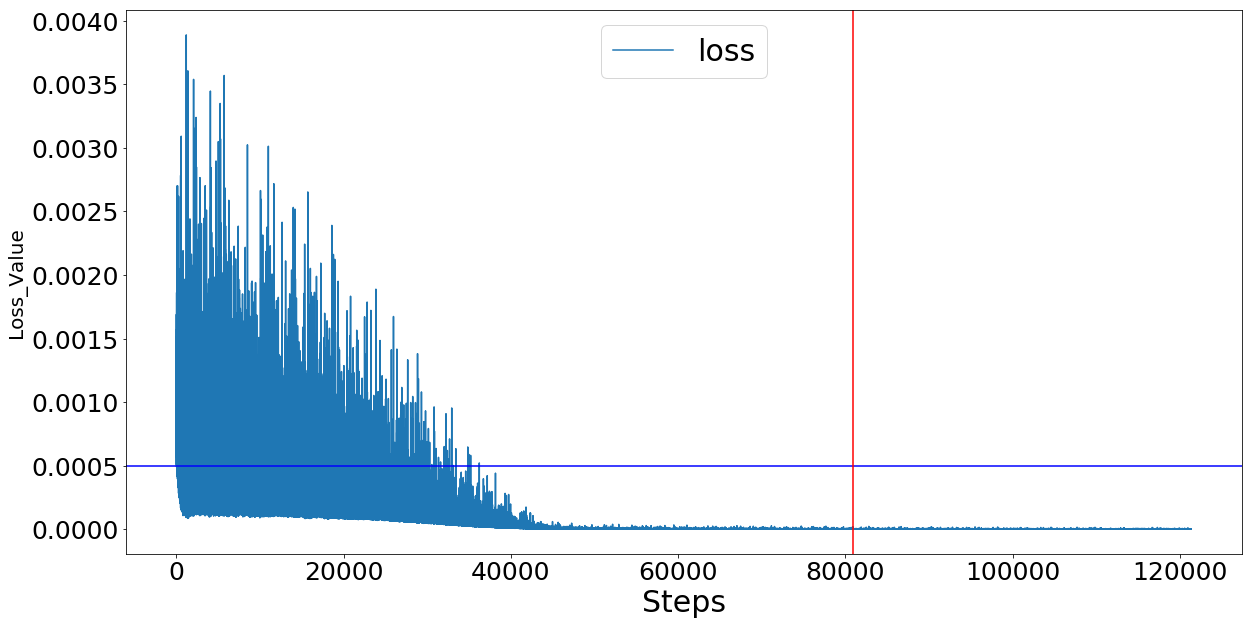

In [80]:
#Plot...

In [81]:
lossvalue=[]
for item in lossmse_his:
    lossvalue.append(abs(item))

In [83]:
losslen=list(range(1,len(lossvalue)+1))

In [84]:
lossvalue2=[]
for i in list(range(int(len(losslen)/500),len(losslen),int(len(losslen)/500))):
    lossvalue2.append(mean(lossvalue[(i-int(len(losslen)/500)):i]))

In [85]:
losslen2=list(range(1,len(lossvalue2)+1))

# coder_the data

In [90]:
encoded = model.encoder(view_data)
decoded = model.decoder(encoded)
#decoded=nn.Softplus(decoded).beta
decoded

tensor([[[0.5047, 0.5008, 0.5172,  ..., 0.4997, 0.5021, 0.5085]],

        [[0.5251, 0.5001, 0.5222,  ..., 0.4986, 0.5221, 0.5111]],

        [[0.5289, 0.5185, 0.5044,  ..., 0.5142, 0.5142, 0.5375]],

        ...,

        [[0.5035, 0.5037, 0.4978,  ..., 0.5003, 0.5824, 0.5192]],

        [[0.5260, 0.5013, 0.5348,  ..., 0.5248, 0.5103, 0.5127]],

        [[0.5051, 0.5019, 0.5281,  ..., 0.5484, 0.4998, 0.5357]]],
       device='cuda:0', grad_fn=<SigmoidBackward>)

In [91]:
output=decoded.squeeze(1).cpu().detach().numpy()
output.shape

(166, 13797)

dfoutput=pd.DataFrame(output).T
dfoutput.columns=dfnew.columns
dfoutput.index=dfnew.index
dfoutput.shape

In [92]:
dfoutput=pd.DataFrame(output).T
dfoutput.columns=dfgbm.columns
dfoutput.index=dfgbm.index
dfoutput.shape

(13797, 166)

In [95]:
mmoutput=(dfoutput.sub(dfoutput.min(1),0)).div((dfoutput.max(1)-dfoutput.min(1)),0)
mmoutput.min(1)

Gene name
NUDT14      0.0
ZNHIT3      0.0
SMU1        0.0
NUDT5       0.0
EHD4        0.0
FAM219B     0.0
LCA5L       0.0
COA3        0.0
MTMR12      0.0
SMARCA4     0.0
DIO2        0.0
MAGEF1      0.0
GOLGA8A     0.0
SLC10A6     0.0
ARC         0.0
GNPDA2      0.0
DERL2       0.0
ENKD1       0.0
CDH4        0.0
VPS13D      0.0
ZMAT5       0.0
CCDC13      0.0
PTK2        0.0
ACAT1       0.0
LGALS3BP    0.0
CCL5        0.0
PHAX        0.0
RARRES2     0.0
GTF2A2      0.0
ZNF410      0.0
           ... 
SSRP1       0.0
UBAP2L      0.0
AASDHPPT    0.0
LMNB2       0.0
UBN1        0.0
RBM24       0.0
EBAG9       0.0
PDE9A       0.0
SCN2A       0.0
ZNF665      0.0
DYRK2       0.0
FARSB       0.0
ZIK1        0.0
DFFB        0.0
DALRD3      0.0
PBDC1       0.0
PAK2        0.0
VPS13A      0.0
RAB9B       0.0
YOD1        0.0
STRN4       0.0
SOWAHC      0.0
PIAS4       0.0
MORN1       0.0
REXO2       0.0
LYN         0.0
PRSS1       0.0
NAT14       0.0
CALML4      0.0
DPH5        0.0
Length: 13797,

In [96]:
medoutput = pd.DataFrame(np.sort(mmoutput.values, axis=1), index=mmoutput.index, columns=mmoutput.columns)
medoutput.mean(0)

TCGA-02-0047    0.000000
TCGA-02-0055    0.003305
TCGA-02-2483    0.005356
TCGA-02-2485    0.006955
TCGA-02-2486    0.008380
TCGA-06-0125    0.009778
TCGA-06-0129    0.011035
TCGA-06-0130    0.012247
TCGA-06-0132    0.013383
TCGA-06-0138    0.014486
TCGA-06-0139    0.015591
TCGA-06-0141    0.016673
TCGA-06-0152    0.017719
TCGA-06-0156    0.018754
TCGA-06-0157    0.019803
TCGA-06-0158    0.020814
TCGA-06-0168    0.021808
TCGA-06-0171    0.022816
TCGA-06-0174    0.023798
TCGA-06-0178    0.024773
TCGA-06-0184    0.025748
TCGA-06-0187    0.026711
TCGA-06-0190    0.027675
TCGA-06-0210    0.028642
TCGA-06-0211    0.029649
TCGA-06-0219    0.030650
TCGA-06-0221    0.031650
TCGA-06-0238    0.032630
TCGA-06-0644    0.033624
TCGA-06-0645    0.034619
                  ...   
TCGA-28-5207    0.237093
TCGA-28-5208    0.242229
TCGA-28-5209    0.247585
TCGA-28-5213    0.253116
TCGA-28-5215    0.258890
TCGA-28-5216    0.264994
TCGA-28-5218    0.271383
TCGA-28-5220    0.278047
TCGA-32-1970    0.285233


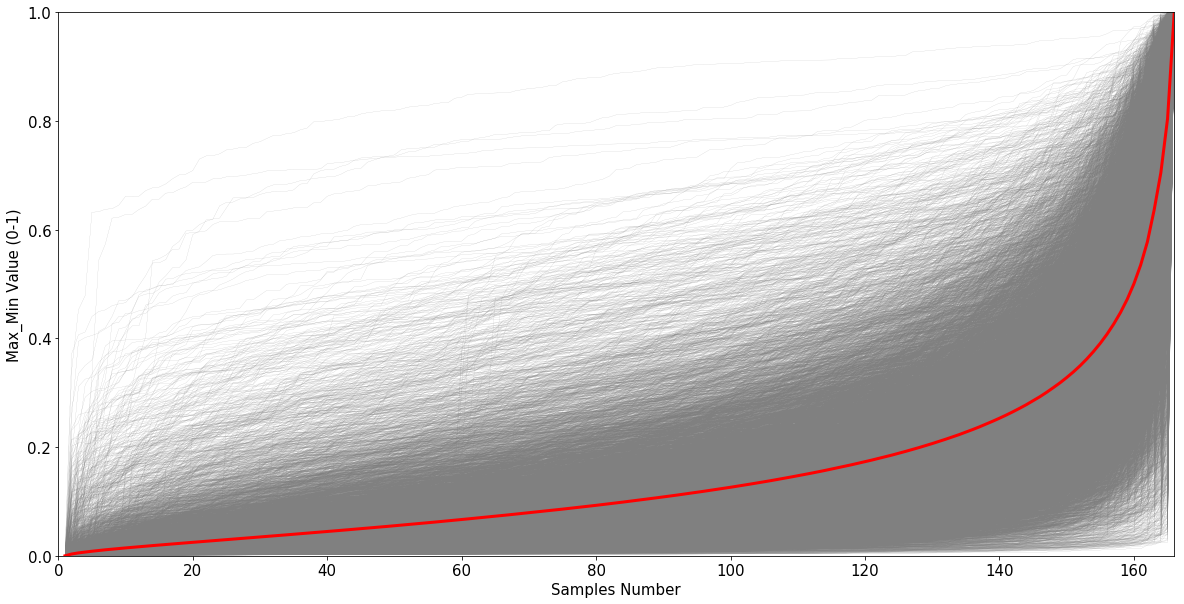

In [97]:
#Plot...

In [98]:
meddfoutput = pd.DataFrame(np.sort(dfoutput.values, axis=1), index=dfoutput.index, columns=dfoutput.columns)
meddfoutput.mean(0)

TCGA-02-0047    0.499654
TCGA-02-0055    0.500324
TCGA-02-2483    0.500734
TCGA-02-2485    0.501065
TCGA-02-2486    0.501353
TCGA-06-0125    0.501644
TCGA-06-0129    0.501908
TCGA-06-0130    0.502161
TCGA-06-0132    0.502399
TCGA-06-0138    0.502634
TCGA-06-0139    0.502867
TCGA-06-0141    0.503095
TCGA-06-0152    0.503318
TCGA-06-0156    0.503538
TCGA-06-0157    0.503761
TCGA-06-0158    0.503978
TCGA-06-0168    0.504193
TCGA-06-0171    0.504409
TCGA-06-0174    0.504619
TCGA-06-0178    0.504827
TCGA-06-0184    0.505037
TCGA-06-0187    0.505244
TCGA-06-0190    0.505451
TCGA-06-0210    0.505659
TCGA-06-0211    0.505879
TCGA-06-0219    0.506093
TCGA-06-0221    0.506309
TCGA-06-0238    0.506520
TCGA-06-0644    0.506736
TCGA-06-0645    0.506948
                  ...   
TCGA-28-5207    0.550893
TCGA-28-5208    0.552011
TCGA-28-5209    0.553170
TCGA-28-5213    0.554370
TCGA-28-5215    0.555626
TCGA-28-5216    0.556950
TCGA-28-5218    0.558338
TCGA-28-5220    0.559783
TCGA-32-1970    0.561343


In [100]:
view_data2=Variable(train).to(device)

In [104]:
#dfoutput.to_csv("/Dropbox/data/proj/PE_HYZ/PublicDataSet/TCGA_GBM/20190228TCGA_GBM_autoencoder/20190327_Allgenes_BulkTissue_30Epcho_PowLaw_noMaxMin_LogStd_CONV1D_output_CNNnoMaxpool_fitPEgbm.tab",sep="\t")

In [106]:
#mmoutput.to_csv("/Dropbox/data/proj/PE_HYZ/PublicDataSet/TCGA_GBM/20190327_Allgenes_BulkTissue_30Epcho_PowLaw_MaxMin_LogStd_CONV1D_output_CNNnoMaxpool_fitPEgbm.tab",sep="\t")

In [107]:
sumloss=np.array([lossmse_his,
lossbcel_his])

In [108]:
dfloss=pd.DataFrame(sumloss)
dfloss.shape

(2, 121320)

In [109]:
dfloss.columns=losslen
dfloss.index=["MSEloss","BCELloss"]

In [112]:
#dfloss.to_csv("/Dropbox/data/proj/PE_HYZ/PublicDataSet/TCGA_GBM/20190228TCGA_GBM_autoencoder/20190327_Allgenes_BulkTissue_30Epcho_PowLaw_MaxMin_LogStd_CONV1D_output_CNNnoMaxpool_fitPEgbm_Loss.tab",sep="\t")